In [ ]:
print("ML setup working 🚀")


ML setup working 🚀


In [ ]:
# 1 Import Libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 2 Load Dataset
df = pd.read_csv(r"C:\Users\G Sai Chandana\OneDrive\Desktop\Fitbit_Calorie_Prediction\data\Fitbit_dataset.csv")
df.head()

,Unnamed: 0,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET,Calories_Burned (kcal)
0,0,56,Female,53.8,1.62,163.0,149.0,71.0,1.01,HIIT,22.1,3.5,3,1,20.4,9.5,0.847826,8.054348,437.7
1,1,46,Male,54.9,1.75,170.0,126.0,73.0,0.25,Yoga,19.9,3.4,3,0,18.0,3.0,0.546392,1.639175,22.5
2,2,32,Female,68.5,1.61,190.0,171.0,60.0,0.33,HIIT,20.4,2.7,3,1,26.5,9.5,0.853846,8.111538,183.4
3,3,25,Male,98.8,1.86,189.0,135.0,69.0,0.78,Yoga,30.3,4.4,3,0,28.5,3.0,0.550000,1.650000,127.2
4,4,38,Male,95.5,1.71,176.0,138.0,66.0,0.55,Cardio,23.7,2.2,2,0,32.5,7.0,0.654545,4.581818,240.7


In [52]:
#3.Basic Inspection
df.shape

(14102, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14102 entries, 0 to 14101
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     14102 non-null  int64  
 1   Age                            14102 non-null  int64  
 2   Gender                         14102 non-null  object 
 3   Weight (kg)                    14102 non-null  float64
 4   Height (m)                     14102 non-null  float64
 5   Max_BPM                        14102 non-null  float64
 6   Avg_BPM                        14102 non-null  float64
 7   Resting_BPM                    14102 non-null  float64
 8   Session_Duration (hours)       14102 non-null  float64
 9   Workout_Type                   14102 non-null  object 
 10  Fat_Percentage                 14102 non-null  float64
 11  Water_Intake (liters)          14102 non-null  float64
 12  Workout_Frequency (days/week)  14102 non-null 

In [47]:
df.isnull().sum()

Unnamed: 0                       0
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Base_MET                         0
HR_Intensity                     0
Effective_MET                    0
Calories_Burned (kcal)           0
dtype: int64

In [ ]:
# 4. Drop Unnecessary Columns
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [53]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET,Calories_Burned (kcal)
count,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000,14102.000000
mean,38.528365,68.252922,1.680338,181.400794,147.955538,69.333073,0.830135,21.844313,3.598624,4.150262,1.150546,24.092838,6.726918,0.701554,4.924756,279.492866
std,12.007994,13.330332,0.097543,12.913603,14.628858,7.110206,0.288531,5.974424,0.626391,1.650013,1.057974,3.776271,2.180444,0.100263,2.124242,172.858430
min,18.000000,37.800000,1.450000,150.000000,109.000000,55.000000,0.250000,8.000000,1.500000,2.000000,0.000000,18.000000,3.000000,0.539474,1.618421,18.400000
25%,28.000000,58.400000,1.610000,171.000000,137.000000,64.000000,0.620000,17.700000,3.200000,3.000000,0.000000,21.200000,6.000000,0.648000,4.187500,143.200000
50%,39.000000,67.300000,1.680000,181.000000,147.000000,70.000000,0.820000,22.000000,3.600000,4.000000,1.000000,24.000000,7.000000,0.700000,4.550000,251.050000
75%,49.000000,77.000000,1.750000,192.000000,158.000000,75.000000,1.030000,26.100000,4.000000,5.000000,2.000000,26.700000,8.000000,0.752475,6.019802,373.700000
max,59.000000,125.100000,1.900000,205.000000,187.000000,85.000000,1.900000,40.000000,5.900000,7.000000,3.000000,35.000000,9.500000,0.860215,8.172043,1442.400000


In [54]:
# 6. Exploratory Data Analysis

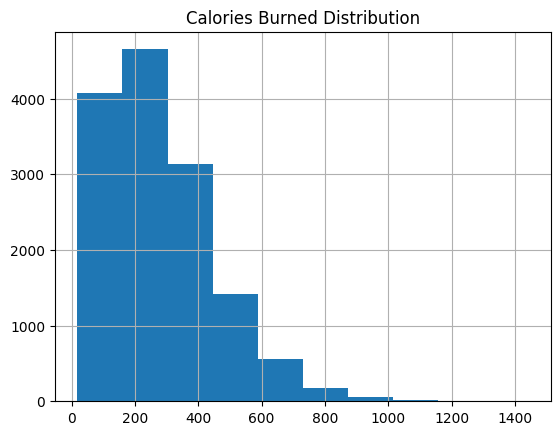

In [ ]:
# Distribution of Target
plt.figure()
df[target].hist()
plt.title("Calories Burned Distribution")
plt.show()

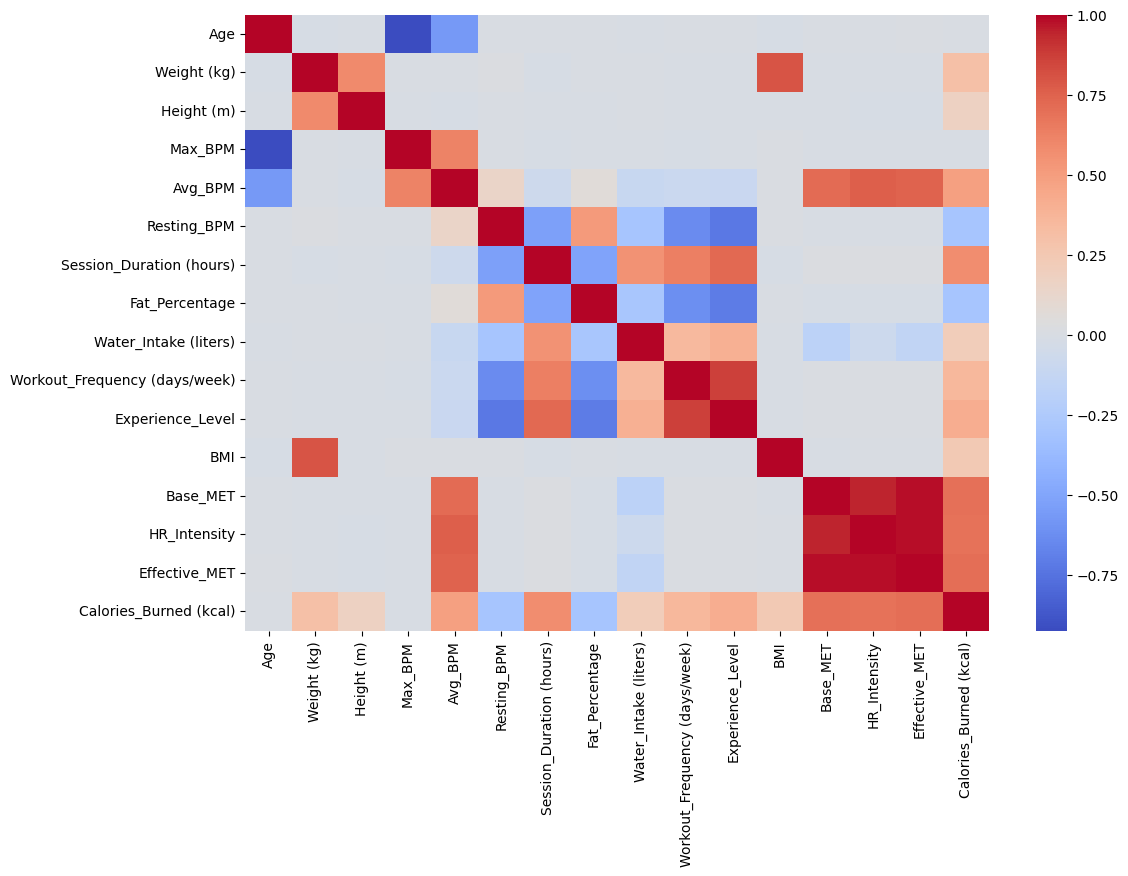

In [56]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()

In [ ]:
# Feature & Target Split

In [88]:
X = df.drop(columns=[target])
y = df[target]

In [89]:
# Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET,Gender_Male,Workout_Type_HIIT,Workout_Type_Mixed,Workout_Type_Strength,Workout_Type_Yoga
0,56,53.8,1.62,163.0,149.0,71.0,1.01,22.1,3.5,3,1,20.4,9.5,0.847826,8.054348,False,True,False,False,False
1,46,54.9,1.75,170.0,126.0,73.0,0.25,19.9,3.4,3,0,18.0,3.0,0.546392,1.639175,True,False,False,False,True
2,32,68.5,1.61,190.0,171.0,60.0,0.33,20.4,2.7,3,1,26.5,9.5,0.853846,8.111538,False,True,False,False,False
3,25,98.8,1.86,189.0,135.0,69.0,0.78,30.3,4.4,3,0,28.5,3.0,0.550000,1.650000,True,False,False,False,True
4,38,95.5,1.71,176.0,138.0,66.0,0.55,23.7,2.2,2,0,32.5,7.0,0.654545,4.581818,True,False,False,False,False


In [90]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((11281, 20), (2821, 20))

In [91]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
import joblib

joblib.dump(scaler, "../data/processed/scaler.pkl")

pd.DataFrame(X_train_scaled).to_csv("../data/processed/X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled).to_csv("../data/processed/X_test_scaled.csv", index=False)

y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

In [57]:
df.corr(numeric_only=True)["Calories_Burned (kcal)"].sort_values(ascending=False)

Calories_Burned (kcal)           1.000000
Effective_MET                    0.704388
Base_MET                         0.692492
HR_Intensity                     0.687703
Session_Duration (hours)         0.573267
Avg_BPM                          0.487559
Experience_Level                 0.415616
Workout_Frequency (days/week)    0.360209
Weight (kg)                      0.305190
BMI                              0.248091
Water_Intake (liters)            0.211870
Height (m)                       0.177545
Age                              0.004587
Max_BPM                         -0.004969
Fat_Percentage                  -0.293446
Resting_BPM                     -0.295764
Name: Calories_Burned (kcal), dtype: float64

In [58]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Base_MET                         0
HR_Intensity                     0
Effective_MET                    0
Calories_Burned (kcal)           0
dtype: int64

In [59]:
target = "Calories_Burned (kcal)"

In [60]:
target in df.columns

True

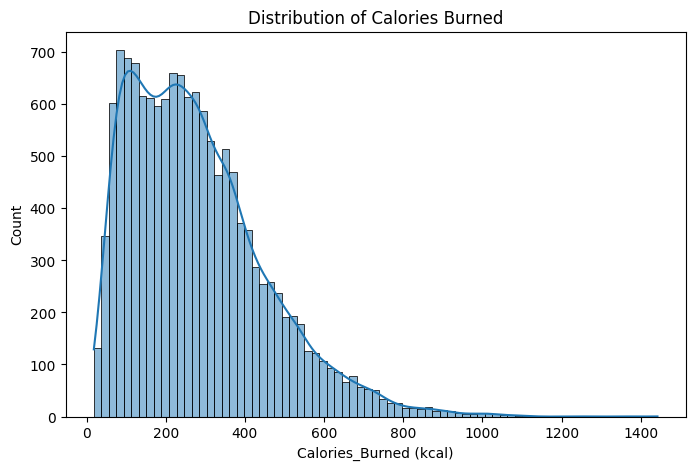

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True)
plt.title("Distribution of Calories Burned")
plt.show()

In [62]:
df[target].describe()

count    14102.000000
mean       279.492866
std        172.858430
min         18.400000
25%        143.200000
50%        251.050000
75%        373.700000
max       1442.400000
Name: Calories_Burned (kcal), dtype: float64

In [63]:
corr_values = df.corr(numeric_only=True)[target].sort_values(ascending=False)
corr_values

Calories_Burned (kcal)           1.000000
Effective_MET                    0.704388
Base_MET                         0.692492
HR_Intensity                     0.687703
Session_Duration (hours)         0.573267
Avg_BPM                          0.487559
Experience_Level                 0.415616
Workout_Frequency (days/week)    0.360209
Weight (kg)                      0.305190
BMI                              0.248091
Water_Intake (liters)            0.211870
Height (m)                       0.177545
Age                              0.004587
Max_BPM                         -0.004969
Fat_Percentage                  -0.293446
Resting_BPM                     -0.295764
Name: Calories_Burned (kcal), dtype: float64

In [64]:
X = df.drop(columns=[target])
y = df[target]

In [65]:
X.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET
0,56,Female,53.8,1.62,163.0,149.0,71.0,1.01,HIIT,22.1,3.5,3,1,20.4,9.5,0.847826,8.054348
1,46,Male,54.9,1.75,170.0,126.0,73.0,0.25,Yoga,19.9,3.4,3,0,18.0,3.0,0.546392,1.639175
2,32,Female,68.5,1.61,190.0,171.0,60.0,0.33,HIIT,20.4,2.7,3,1,26.5,9.5,0.853846,8.111538
3,25,Male,98.8,1.86,189.0,135.0,69.0,0.78,Yoga,30.3,4.4,3,0,28.5,3.0,0.550000,1.650000
4,38,Male,95.5,1.71,176.0,138.0,66.0,0.55,Cardio,23.7,2.2,2,0,32.5,7.0,0.654545,4.581818


In [66]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET,Gender_Male,Workout_Type_HIIT,Workout_Type_Mixed,Workout_Type_Strength,Workout_Type_Yoga
0,56,53.8,1.62,163.0,149.0,71.0,1.01,22.1,3.5,3,1,20.4,9.5,0.847826,8.054348,False,True,False,False,False
1,46,54.9,1.75,170.0,126.0,73.0,0.25,19.9,3.4,3,0,18.0,3.0,0.546392,1.639175,True,False,False,False,True
2,32,68.5,1.61,190.0,171.0,60.0,0.33,20.4,2.7,3,1,26.5,9.5,0.853846,8.111538,False,True,False,False,False
3,25,98.8,1.86,189.0,135.0,69.0,0.78,30.3,4.4,3,0,28.5,3.0,0.550000,1.650000,True,False,False,False,True
4,38,95.5,1.71,176.0,138.0,66.0,0.55,23.7,2.2,2,0,32.5,7.0,0.654545,4.581818,True,False,False,False,False


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((11281, 20), (2821, 20))

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:2]

array([[ 1.63851183e+00,  7.04797081e-01, -1.23028650e-03,
        -1.21126820e+00, -5.54110391e-01,  1.50388032e+00,
        -1.70120374e+00, -1.45337838e-02, -6.45130957e-01,
        -6.93667633e-01, -1.08681839e+00,  8.87995029e-01,
        -3.34275278e-01, -4.30556047e-02, -3.49834833e-01,
         9.94607219e-01, -5.10753918e-01, -5.01357005e-01,
         1.98146433e+00, -4.94286795e-01],
       [ 1.63851183e+00, -2.27859531e+00, -2.36577716e+00,
        -1.75691793e+00, -1.16949295e+00,  1.08080968e+00,
        -1.70612826e-01,  1.72664706e+00, -1.28650950e+00,
        -6.93667633e-01, -1.08681839e+00, -1.60531222e+00,
         1.23810170e-01, -4.33065062e-01, -1.50669977e-01,
        -1.00542202e+00, -5.10753918e-01, -5.01357005e-01,
        -5.04677267e-01, -4.94286795e-01]])

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results
MAE: 34.61865222073457
RMSE: 52.75813367061049
R2 Score: 0.9113453112537713


In [75]:
df_cluster = df.drop(columns=["Workout_Type", "Calories_Burned (kcal)"])

In [77]:
df_cluster = pd.get_dummies(df_cluster, drop_first=True)



In [78]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

In [79]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

In [82]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(pca_data, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.38056211988372585


In [83]:
df_clustered = df.copy()
df_clustered["Cluster"] = clusters

In [84]:
df_clustered = df.copy()
df_clustered["Cluster"] = clusters

In [85]:
df_clustered["Cluster"].value_counts()

Cluster
0    6289
2    4321
1    3492
Name: count, dtype: int64

In [86]:
df_clustered["Cluster"].value_counts()

Cluster
0    6289
2    4321
1    3492
Name: count, dtype: int64

In [87]:
cluster_profile = df_clustered.groupby("Cluster").mean(numeric_only=True)
cluster_profile

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Base_MET,HR_Intensity,Effective_MET,Calories_Burned (kcal)
Cluster,,,,,,,,,,,,,,,,
0,37.196057,68.375020,1.680184,182.988233,154.850533,73.435363,0.659836,25.133423,3.302608,3.055335,0.403721,24.132851,7.731674,0.743985,5.841423,265.060153
1,41.909507,68.381787,1.681964,177.468786,131.661226,69.476518,0.815633,22.199255,3.741123,4.085911,1.083620,24.090321,3.816724,0.578618,2.283439,128.199198
2,37.735015,67.971072,1.679246,182.267994,151.088405,63.246471,1.089715,16.770331,3.914302,5.795881,2.291599,24.036635,7.616408,0.739149,5.725163,422.766374
